Arewa Datascience Pytorch Fellowship
Week 4 excercise solution
Mustapha Abdulkadir Sani
mustapha.abdulkadir2205@gmail.com

# ***Question one:***
The three methods for for preventing undefittings

1.   Train for more epochs: Training a model for more epochs allows the model to adjust model parameters and be able to learn patterns in the data more.
2.   Reduce Regularization: Reducing regularization allows model to learn more complex pattern from the training data.
3.  Use more complex model: if model is too small it may not be able to capture the pattern in the data effectively, adding more hidden layer and neuron enable models to discover more npattern in the training data



# ***Question two***
Re-creating the data loading function

In [6]:
# 2. Becoming one with the data
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents. """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [7]:
# 1. Getting the data
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [8]:
# setting device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [9]:
# invoking the above function
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.


In [10]:
# Setting training and test paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/train/sushi/1280119.jpg
Image class: sushi
Image height: 512
Image width: 512


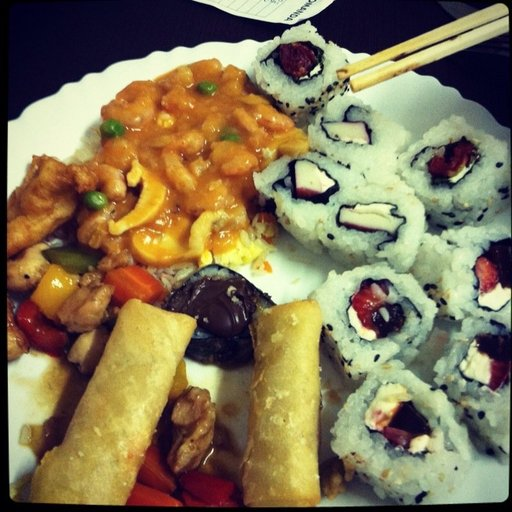

In [11]:
# Visualising an image
import random
from PIL import Image

# Set seed
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

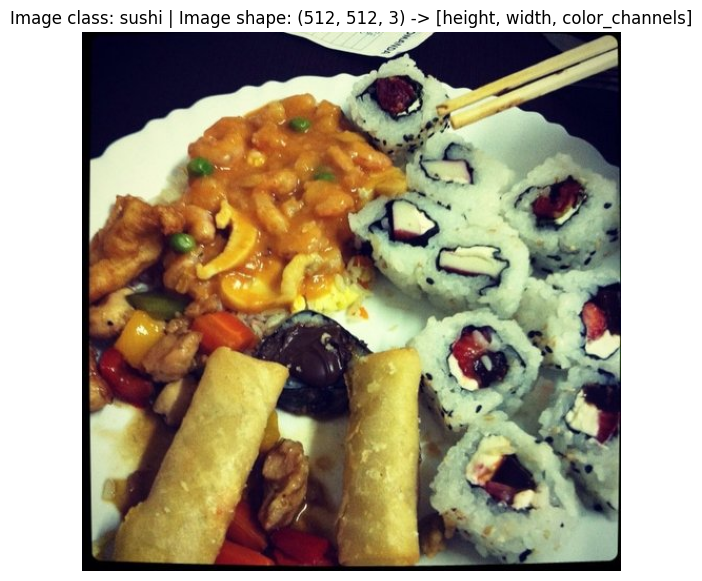

In [12]:
# visualising image with matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [13]:
# 3.1 Transforming data with torchvision.transforms
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms



In [14]:
# wrting transform for turning images into tensors
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this normalize all pixel values from 0 to 255 to be between 0.0 and 1.0
])

In [15]:
# Writing a function to plot transformed images
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)



In [16]:
# calling the created function for plotting transforming images

Loading image data using ImageFolder

In [17]:
# Load image data using ImageFolder
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [18]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [19]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [20]:
# Check the lengths
len(train_data), len(test_data)

(225, 75)

In [21]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ed5544d5f50>,
 <torch.utils.data.dataloader.DataLoader at 0x7ed54c05ed90>)

In [22]:
# How many batches of images are in our data loaders?
len(train_dataloader), len(test_dataloader)

(225, 75)

 Recreating model_0 we built in section 7 of notebook 04.

In [23]:
import torch
import torch.nn as nn # Importing the necessary module
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

class TinyVGG(nn.Module):

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

Creating training and testing functions for model_0.

In [24]:
# creating train_step function
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metrics across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [25]:
# creating test_step function
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [26]:
# combining train_step and test_step function into a single function named train_function
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

Training the model using different training eposch, 5, 20 and 50 epochs

In [27]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Set number of epochs
NUM_EPOCHS = 5

# Train the model
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1177 | train_acc: 0.2978 | test_loss: 1.0970 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0999 | train_acc: 0.2889 | test_loss: 1.0994 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.0992 | train_acc: 0.3200 | test_loss: 1.0996 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0990 | train_acc: 0.3333 | test_loss: 1.0999 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0988 | train_acc: 0.3289 | test_loss: 1.1000 | test_acc: 0.3333


In [28]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Set number of epochs
NUM_EPOCHS = 20

# Train the model
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1177 | train_acc: 0.2978 | test_loss: 1.0970 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0999 | train_acc: 0.2889 | test_loss: 1.0994 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.0992 | train_acc: 0.3200 | test_loss: 1.0996 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0990 | train_acc: 0.3244 | test_loss: 1.0999 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0988 | train_acc: 0.3289 | test_loss: 1.1001 | test_acc: 0.3333
Epoch: 6 | train_loss: 1.0989 | train_acc: 0.3467 | test_loss: 1.1004 | test_acc: 0.3333
Epoch: 7 | train_loss: 1.0961 | train_acc: 0.3956 | test_loss: 1.0524 | test_acc: 0.4667
Epoch: 8 | train_loss: 1.0515 | train_acc: 0.5200 | test_loss: 1.0449 | test_acc: 0.4933
Epoch: 9 | train_loss: 0.9838 | train_acc: 0.5511 | test_loss: 1.0011 | test_acc: 0.5067
Epoch: 10 | train_loss: 0.9024 | train_acc: 0.5778 | test_loss: 0.9783 | test_acc: 0.4800
Epoch: 11 | train_loss: 0.8746 | train_acc: 0.6133 | test_loss: 0.9845 | test_acc: 0.4667
Epoch: 12 | train_l

In [29]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Set number of epochs
NUM_EPOCHS = 50

# Train the model
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1177 | train_acc: 0.2978 | test_loss: 1.0970 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0999 | train_acc: 0.2889 | test_loss: 1.0994 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.0992 | train_acc: 0.3200 | test_loss: 1.0996 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0990 | train_acc: 0.3333 | test_loss: 1.0999 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0988 | train_acc: 0.3289 | test_loss: 1.1000 | test_acc: 0.3333
Epoch: 6 | train_loss: 1.0989 | train_acc: 0.3467 | test_loss: 1.1003 | test_acc: 0.3333
Epoch: 7 | train_loss: 1.0979 | train_acc: 0.3511 | test_loss: 1.1002 | test_acc: 0.3067
Epoch: 8 | train_loss: 1.1083 | train_acc: 0.3911 | test_loss: 1.0927 | test_acc: 0.3733
Epoch: 9 | train_loss: 1.0389 | train_acc: 0.5067 | test_loss: 0.9827 | test_acc: 0.5067
Epoch: 10 | train_loss: 0.9330 | train_acc: 0.5600 | test_loss: 0.9729 | test_acc: 0.4667
Epoch: 11 | train_loss: 0.8974 | train_acc: 0.5733 | test_loss: 0.9708 | test_acc: 0.4933
Epoch: 12 | train_l

Doubling the number of hidden units in your model and train it for 20 epochs

In [30]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3,
                  hidden_units=20, # hidden units doubled from 10 to 20
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Set number of epochs
NUM_EPOCHS = 20 # number of epochs changed to 20

# Train the model
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1003 | train_acc: 0.3600 | test_loss: 1.0817 | test_acc: 0.3067
Epoch: 2 | train_loss: 1.0303 | train_acc: 0.4400 | test_loss: 1.0007 | test_acc: 0.4667
Epoch: 3 | train_loss: 0.9605 | train_acc: 0.5867 | test_loss: 0.9928 | test_acc: 0.4533
Epoch: 4 | train_loss: 0.9100 | train_acc: 0.5911 | test_loss: 1.0326 | test_acc: 0.4800
Epoch: 5 | train_loss: 0.9042 | train_acc: 0.5689 | test_loss: 0.9808 | test_acc: 0.3867
Epoch: 6 | train_loss: 0.8378 | train_acc: 0.6489 | test_loss: 0.9651 | test_acc: 0.4800
Epoch: 7 | train_loss: 0.8232 | train_acc: 0.6667 | test_loss: 1.0817 | test_acc: 0.4667
Epoch: 8 | train_loss: 0.7865 | train_acc: 0.6489 | test_loss: 1.0225 | test_acc: 0.4267
Epoch: 9 | train_loss: 0.7177 | train_acc: 0.6667 | test_loss: 1.0892 | test_acc: 0.4000
Epoch: 10 | train_loss: 0.7083 | train_acc: 0.7067 | test_loss: 1.0268 | test_acc: 0.4267
Epoch: 11 | train_loss: 0.7117 | train_acc: 0.7067 | test_loss: 1.0523 | test_acc: 0.4000
Epoch: 12 | train_l

Double the data you're using with your model from step 6 and train it for 20 epochs

In [31]:


# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)


# See how many images we have
walk_through_dir(image_path)


# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path


# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

# Create datasets
from torchvision import datasets
train_data_20_percent = ImageFolder(train_data_20_percent_path,
                                    transform=simple_transform,
                                    target_transform=None)

test_data_20_percent = ImageFolder(test_data_20_percent_path,
                                   transform=simple_transform)

print(f"Train data:\n{train_data_20_percent}\nTest data:\n{test_data_20_percent}")

# Create dataloaders
from torch.utils.data import DataLoader
train_dataloader_20_percent = DataLoader(dataset=train_data_20_percent,
                                         batch_size=32,
                                         shuffle=True,
                                         num_workers=1,
                                         pin_memory=True)

test_dataloader_20_percent = DataLoader(dataset=test_data_20_percent,
                                        batch_size=32,
                                        shuffle=False,
                                        num_workers=1,
                                        pin_memory=True)



# Train a model with increased amount of data for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3,
                  hidden_units=20, # hidden units doubled from 10 to 20
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Set number of epochs
NUM_EPOCHS = 20 # number of epochs changed to 20

# Train the model
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_20_percent,
                        test_dataloader=test_dataloader_20_percent,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)




Did not find data/pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...
There are 2 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi_20_percent/train/sushi'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi_20_percent/train/steak'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi_20_percent/train/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/sushi'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi_20_percent/test/steak'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/pizza'.
Train data:
Dataset ImageFolder
    Number of datapoints: 450
    Root location: data/pizza_steak_sush

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1042 | train_acc: 0.3312 | test_loss: 1.1003 | test_acc: 0.2875
Epoch: 2 | train_loss: 1.0837 | train_acc: 0.3583 | test_loss: 1.0734 | test_acc: 0.3517
Epoch: 3 | train_loss: 1.0319 | train_acc: 0.4333 | test_loss: 0.9627 | test_acc: 0.4955
Epoch: 4 | train_loss: 0.9210 | train_acc: 0.5604 | test_loss: 0.9142 | test_acc: 0.5909
Epoch: 5 | train_loss: 0.8614 | train_acc: 0.6667 | test_loss: 0.9116 | test_acc: 0.5676
Epoch: 6 | train_loss: 0.8660 | train_acc: 0.5896 | test_loss: 0.9528 | test_acc: 0.5244
Epoch: 7 | train_loss: 0.8942 | train_acc: 0.6042 | test_loss: 0.8915 | test_acc: 0.5403
Epoch: 8 | train_loss: 0.7650 | train_acc: 0.6729 | test_loss: 0.9307 | test_acc: 0.6011
Epoch: 9 | train_loss: 0.7857 | train_acc: 0.6458 | test_loss: 0.9301 | test_acc: 0.4989
Epoch: 10 | train_loss: 0.7947 | train_acc: 0.6625 | test_loss: 0.8425 | test_acc: 0.6159
Epoch: 11 | train_loss: 0.7251 | train_acc: 0.6708 | test_loss: 0.8935 | test_acc: 0.6102
Epoch: 12 | train_l

Making a prediction on your own custom image

In [32]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image("pizza.png")

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[ 49,  50,  52,  ...,  48,  32,  14],
         [ 58,  59,  60,  ...,  70,  69,  68],
         [ 70,  70,  70,  ...,  51,  67,  82],
         ...,
         [189, 101,  39,  ..., 175, 180, 185],
         [ 41,  72, 113,  ..., 176, 174, 173],
         [145, 148, 148,  ..., 177, 176, 177]],

        [[ 44,  45,  47,  ...,  34,  16,   0],
         [ 53,  54,  55,  ...,  58,  55,  54],
         [ 65,  65,  65,  ...,  41,  55,  70],
         ...,
         [172,  84,  22,  ..., 170, 175, 180],
         [ 24,  55,  96,  ..., 168, 169, 168],
         [128, 131, 131,  ..., 169, 171, 172]],

        [[ 40,  41,  43,  ...,  21,   1,   0],
         [ 49,  50,  51,  ...,  44,  42,  41],
         [ 61,  61,  61,  ...,  31,  43,  58],
         ...,
         [154,  66,   6,  ..., 167, 172, 177],
         [  6,  37,  80,  ..., 165, 166, 165],
         [108, 111, 113,  ..., 166, 168, 169]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 183, 275])

Custom image dtype

In [33]:
# Load in custom image and convert the tensor values to float32
import torch
custom_image = torchvision.io.read_image("pizza.png").type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.1922, 0.1961, 0.2039,  ..., 0.1882, 0.1255, 0.0549],
         [0.2275, 0.2314, 0.2353,  ..., 0.2745, 0.2706, 0.2667],
         [0.2745, 0.2745, 0.2745,  ..., 0.2000, 0.2627, 0.3216],
         ...,
         [0.7412, 0.3961, 0.1529,  ..., 0.6863, 0.7059, 0.7255],
         [0.1608, 0.2824, 0.4431,  ..., 0.6902, 0.6824, 0.6784],
         [0.5686, 0.5804, 0.5804,  ..., 0.6941, 0.6902, 0.6941]],

        [[0.1725, 0.1765, 0.1843,  ..., 0.1333, 0.0627, 0.0000],
         [0.2078, 0.2118, 0.2157,  ..., 0.2275, 0.2157, 0.2118],
         [0.2549, 0.2549, 0.2549,  ..., 0.1608, 0.2157, 0.2745],
         ...,
         [0.6745, 0.3294, 0.0863,  ..., 0.6667, 0.6863, 0.7059],
         [0.0941, 0.2157, 0.3765,  ..., 0.6588, 0.6627, 0.6588],
         [0.5020, 0.5137, 0.5137,  ..., 0.6627, 0.6706, 0.6745]],

        [[0.1569, 0.1608, 0.1686,  ..., 0.0824, 0.0039, 0.0000],
         [0.1922, 0.1961, 0.2000,  ..., 0.1725, 0.1647, 0.1608],
         [0.2392, 0.2392, 0.2392,  ..

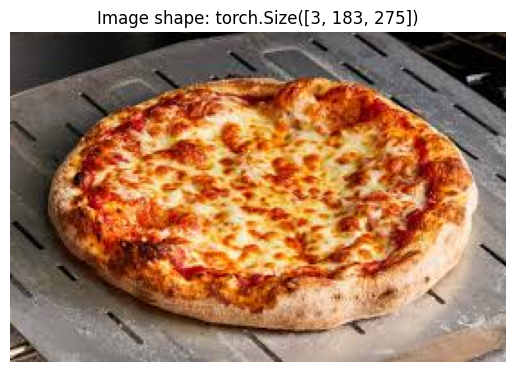

In [35]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [34]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 183, 275])
New shape: torch.Size([3, 64, 64])


In [36]:
model_0.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    # Make a prediction on image with an extra dimension
    custom_image_pred = model_0(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [37]:
custom_image_pred

tensor([[ 0.5477, -5.2004,  0.1801]], device='cuda:0')

In [38]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[ 0.5477, -5.2004,  0.1801]], device='cuda:0')
Prediction probabilities: tensor([[0.5898, 0.0019, 0.4083]], device='cuda:0')
Prediction label: tensor([0], device='cuda:0')


In [39]:
# Find the predicted label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

'pizza'

In [41]:
# functionalizing prediction on custom images
from typing import List
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""

    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255.

    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))

    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

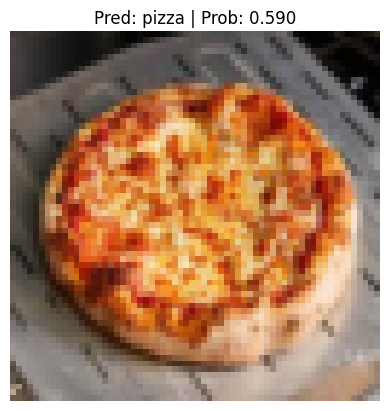

In [43]:
# Pred on our custom image
pred_and_plot_image(model=model_0,
                    image_path="pizza.png",
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

Despite the poor performance of my model on the evaluation metrics, it still got it right.